# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main
import matplotlib 
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [2]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
552 µs ± 40.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 106.59 MiB, increment: 1.02 MiB


SIZE:  1000
Timing: 
58.1 ms ± 6.51 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 115.71 MiB, increment: 9.11 MiB


SIZE:  10000
Timing: 
6.84 s ± 2.71 s per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2162.93 MiB, increment: 2089.71 MiB




***Zadanie 1.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


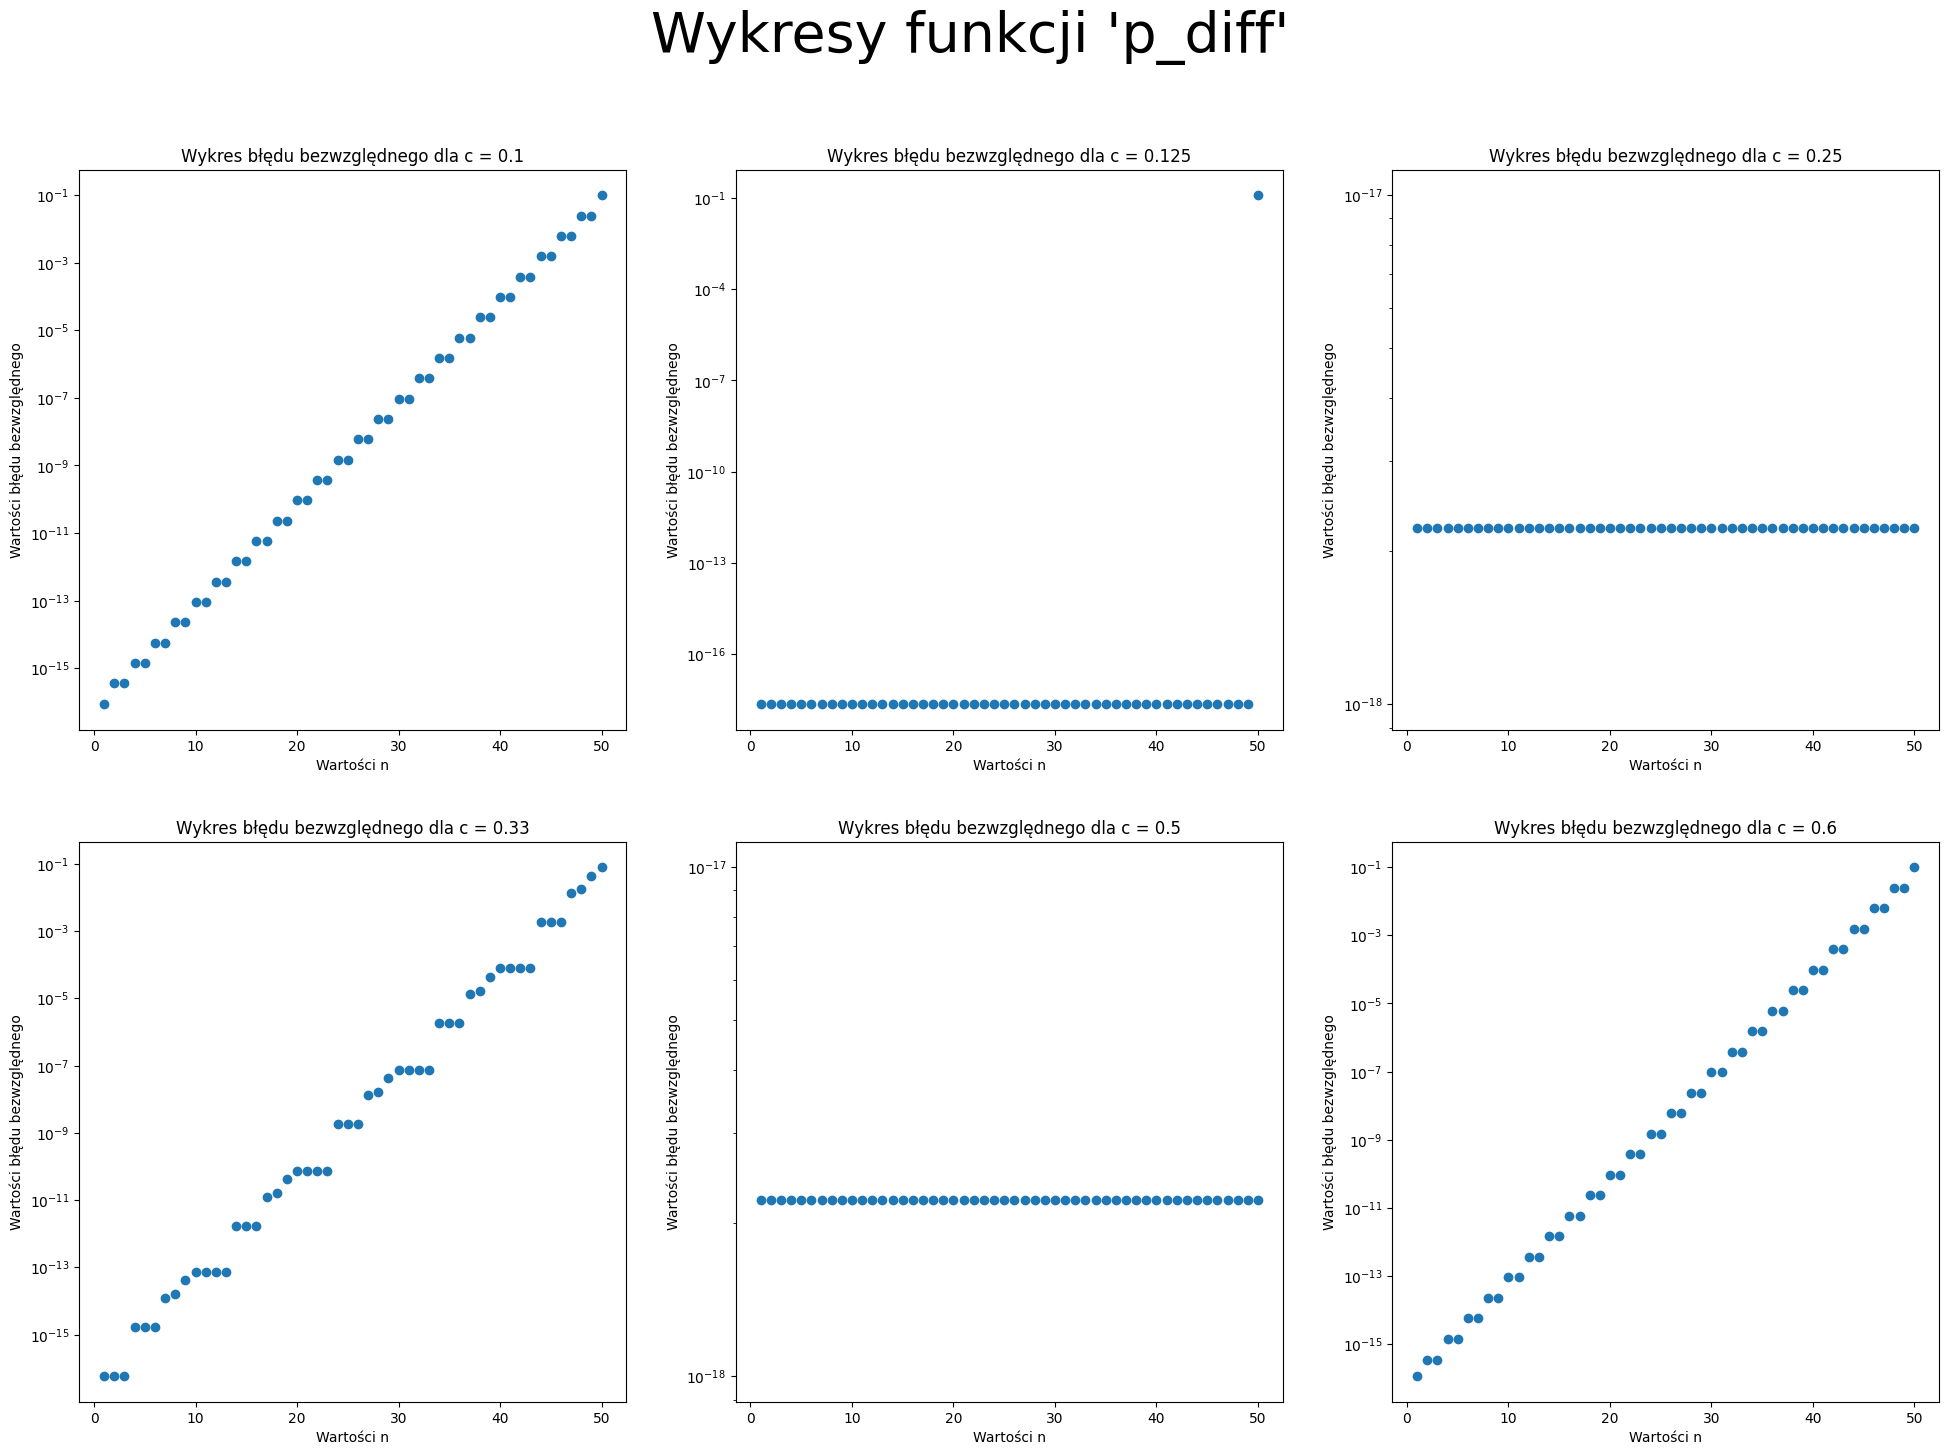

In [3]:
c = np.array([0.1,0.125,0.25,0.33,0.5,0.6])
n = np.arange(1,51,1)
k = np.arange(1.0,51.0,1.0)
tab = np.ones([50,6])
for i in range(50):
    for j in range(6):
        tab[i,j] = main.p_diff(int(n[i]),float(c[j]))
plt.figure(figsize = [24,16])

for i in range(len(c)):
    plt.subplot(int("23"+str(i+1)))
    plt.plot(k,tab[:,i]+2.220e-18,'o')
    plt.yscale("log")

    plt.title(f"Wykres błędu bezwzględnego dla c = {c[i]}")
    plt.xlabel("Wartości n")
    plt.ylabel("Wartości błędu bezwzględnego")
    plt.suptitle("Wykresy funkcji 'p_diff' ", fontsize = 40)

1) Dla wszystkich przypadków powinno wyjść zero, ale w niektórych wystąpił wynik, który w niewielkim przybliżeniu również daje zero.
2) Skończoną reprezentację posiadają liczby [0.125, 0.25, 0.5], które są ujemną potęgą dwójki, nieskończoną reprezentację mają pozostałe liczby [0.1, 0.33, 0.6].
3) Wyniki różnią się od siebie, ponieważ mają ograniczoną liczbę bitów ich zapis.
4) Występuje tu błąd zaokrąglenia.
5) Istnieje możliwość poprawy działania tych wyrażeń, należałoby zwiększyć ilość bitów do mantysy( ułamkowej części po przecinku, przed którym wyrażona jest cecha).

***Zadanie 2.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

In [4]:
abs_error=np.zeros(8)
rel_error=np.zeros(8)
x=np.arange(0,8,8)

for n in range(8):
    abs_error[n]=main.absolut_error(np.exp, main.exponential(x,n+1))
    rel_error[n]=main.relative_error(np.exp, main.exponential(x,n+1))
    print(f"Dla n={n+1}, e={main.exponential(1,n+1)} błąd bezwzględny wynosi:{main.absolut_error(np.exp(1), main.exponential(1,n+1)) :.10f},a błąd względny: {main.relative_error(np.exp(1), main.exponential(1,n+1)) :.10f}\n")


Dla n=1, e=1.0 błąd bezwzględny wynosi:1.7182818285,a błąd względny: 0.6321205588

Dla n=2, e=2.0 błąd bezwzględny wynosi:0.7182818285,a błąd względny: 0.2642411177

Dla n=3, e=2.5 błąd bezwzględny wynosi:0.2182818285,a błąd względny: 0.0803013971

Dla n=4, e=2.6666666666666665 błąd bezwzględny wynosi:0.0516151618,a błąd względny: 0.0189881569

Dla n=5, e=2.708333333333333 błąd bezwzględny wynosi:0.0099484951,a błąd względny: 0.0036598468

Dla n=6, e=2.7166666666666663 błąd bezwzględny wynosi:0.0016151618,a błąd względny: 0.0005941848

Dla n=7, e=2.7180555555555554 błąd bezwzględny wynosi:0.0002262729,a błąd względny: 0.0000832411

Dla n=8, e=2.7182539682539684 błąd bezwzględny wynosi:0.0000278602,a błąd względny: 0.0000102492



1) Ten przykład obrazuje błąd metody, który wynika z obliczenia skończonej liczby kroków dla metody posiadającej nieskończone rozwinięcie.
2) Wraz ze wzrostem n zarówno błąd bezwzględny, jak i błąd względny coraz szybciej się zmiejszają.

***Zadania 3.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [5]:
print("Metoda 1:")
print(f"x = pi/4; k = {2}; cos(pi/2) = {main.coskx1(2, np.pi/4)}")
print(f"x = pi/4; k = {4}; cos(pi) = {main.coskx1(4, np.pi/4)}")
print(f"x = pi/4; k = {6}; cos(3*pi/2) = {main.coskx1(6, np.pi/4)}")
print(f"x = pi/4; k = {8}; cos(2*pi) = {main.coskx1(8, np.pi/4)}")
print(" \n")
print("Metoda 2:")
print(f"x = pi/4; k = {2}; cos(pi/2) = {main.coskx2(2, np.pi/4)[0]}; sin(pi/2) = {main.coskx2(2, np.pi/4)[1]}") 
print(f"x = pi/4; k = {4}; cos(pi) = {main.coskx2(4, np.pi/4)[0]}; sin(pi) = {main.coskx2(4, np.pi/4)[1]}") 
print(f"x = pi/4; k = {6}; cos(3*pi/2) = {main.coskx2(6, np.pi/4)[0]}; sin(3*pi/2) = {main.coskx2(6, np.pi/4)[1]}")
print(f"x = pi/4; k = {8}; cos(2*pi) = {main.coskx2(8, np.pi/4)[0]}; sin(2*pi) = {main.coskx2(8, np.pi/4)[1]}")


Metoda 1:
x = pi/4; k = 2; cos(pi/2) = 2.220446049250313e-16
x = pi/4; k = 4; cos(pi) = -1.0
x = pi/4; k = 6; cos(3*pi/2) = -2.220446049250313e-16
x = pi/4; k = 8; cos(2*pi) = 1.0
 

Metoda 2:
x = pi/4; k = 2; cos(pi/2) = 0.0; sin(pi/2) = 1.0000000000000002
x = pi/4; k = 4; cos(pi) = -1.0000000000000002; sin(pi) = 0.0
x = pi/4; k = 6; cos(3*pi/2) = 0.0; sin(3*pi/2) = -1.0000000000000002
x = pi/4; k = 8; cos(2*pi) = 1.0000000000000002; sin(2*pi) = 0.0


***Zadanie 4.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 2 w zależności od różnych wartości $N$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby $e$ w zależności od $N$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby $e$ od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

1.05 µs ± 291 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.90 MiB, increment: 0.03 MiB
500 ns ± 160 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.90 MiB, increment: 0.00 MiB
474 ns ± 123 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.95 MiB, increment: 0.04 MiB
504 ns ± 178 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.95 MiB, increment: 0.00 MiB
480 ns ± 135 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.95 MiB, increment: 0.00 MiB
1.27 µs ± 293 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.95 MiB, increment: 0.00 MiB
468 ns ± 116 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.95 MiB, increment: 0.00 MiB
1.57 µs ± 238 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.96 MiB, increment: 0.01 MiB
900 ns ± 246 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.96 MiB, 

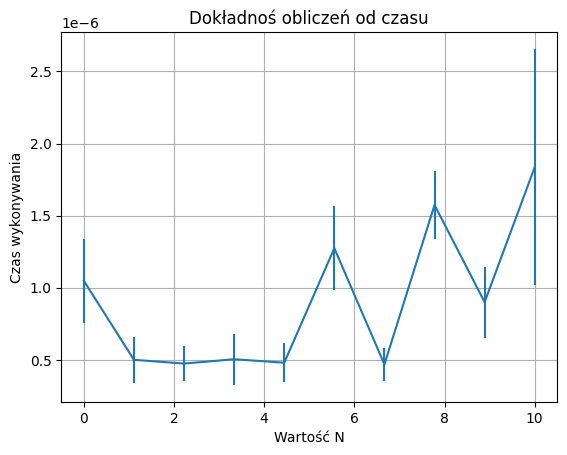

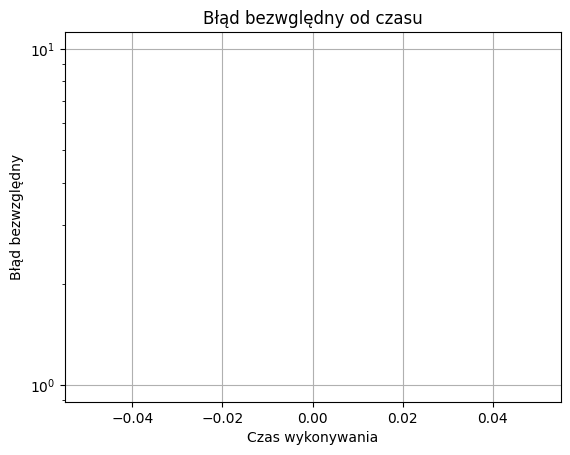

In [7]:
time = np.zeros(10)
stand_deviation = np.zeros(10)
error = np.zeros(10)
x = np.linspace(0,10,10)
memory_usage = np.zeros(10)

for n in range(10):
    saved_timing = %timeit -r 5 -n 10 -o main.exponential(x,n)
    time[n] = saved_timing.average
    stand_deviation[n] = saved_timing.stdev
    memory_usage = %memit main.exponential(x,n)
    error[n] = main.absolut_error(np.exp, main.exponential(x,n+1))

plt.errorbar(x, time, yerr=stand_deviation)
plt.title("Dokładnoś obliczeń od czasu")
plt.xlabel("Wartość N")
plt.ylabel("Czas wykonywania")
plt.grid()
plt.show()

plt.semilogy(time, error, "o")
plt.title("Błąd bezwględny od czasu")
plt.xlabel("Czas wykonywania")
plt.ylabel("Błąd bezwzględny")
plt.grid()
plt.show()

*Wnioski*

Podczas tego ćwiczenia zapoznałam się bliżej z błędami numerycznymi. Skorzystałam m.in. z biblioteki numpy, która umożliwiła wyliczyć wartości dla sin(x), cos(x). Za pomocą funkcji timeit i memit dokonałam badania czasu działania oraz zużycia pamięci przez daną w zadaniu funkcję.